<a href="https://colab.research.google.com/github/riya461/Learn_ML/blob/main/Maths/LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vector - mathematical entity  represent physical quantity - magnitude and direction

Matrices - represent vector transformation

A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}

In [9]:
import numpy as np
from scipy import linalg
a = np.array([[1,2],[3,4],[5,6]])
print(a)

[[1 2]
 [3 4]
 [5 6]]


**Linear system**

\begin{equation}  
3x_1 + 2x_2 = 12
\end{equation}  


\begin{equation}  
2x_1 - x_2 = 1
\end{equation}  

\begin{equation*}
\left( \begin{bmatrix}
 3 & 2 \\
2 & -1
\end{bmatrix} \right)
.
\left( \begin{bmatrix}
 x_1 \\
x_2
\end{bmatrix} \right)
=
\left( \begin{bmatrix}
 12 \\
1
\end{bmatrix} \right)
\end{equation*}

\begin{equation}
x = A^{-1} b
\end{equation}


In [17]:
A = np.array(
    [
        [3,2],
        [2,-1]
    ]
)
b = np.array([12,1]).reshape((2,1))
x = linalg.solve(A,b)
print(x)

[[2.]
 [3.]]


In [18]:
A = np.array(
    [
        [3,2],
        [2,-1]
    ]
)
A_inv = linalg.inv(A)
x = np.dot(A_inv,b)
print(x)

[[2.]
 [3.]]


In [19]:
np.linalg.det(A)

-6.999999999999999

## Singular matrix

- det(A) = 0
- inverse does not exist

Least Square

Taking a matrix singular here
Fitting a parabola to points (1,5) (2,13) (2,25) has no solution
- least square minimises the squared difference between curve and data points

\begin{equation}  
a_0 + a_1 + a_2 = 5
\end{equation}  


\begin{equation}  
a_0 + 2 a_1 + 4a_2 = 13
\end{equation}  


\begin{equation}  
a_0 + 2 a_1 + 4a_2 = 25
\end{equation}  


In [20]:
# not a precise fir - approximate points
A = np.array([[1,1,1],[1,2,4],[1,2,4]])
b = np.array([5,13,25]).reshape((3,1))
try:
  x = linalg.solve(A,b)
  print(x)
except np.linalg.LinAlgError as e:
  print(e)


Matrix is singular.


In [23]:
p, *_ = linalg.lstsq(A,b)
print(p)

[[-0.42857143]
 [ 1.14285714]
 [ 4.28571429]]


<function matplotlib.pyplot.show(close=None, block=None)>

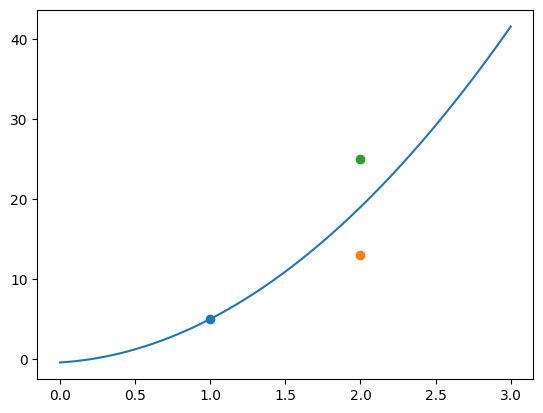

In [25]:
import matplotlib.pyplot as plt
x = np.linspace(0,3,1000)
y = p[0] + p[1]*x + p[2]*x**2
plt.plot(x,y)
plt.scatter(1,5)
plt.scatter(2,13)
plt.scatter(2,25)
plt.show

Pseudo inverse
- Moore Penrose pseudoinverse
- best fit leading to least square solution

In [26]:
A_pinv = linalg.pinv(A)
x = np.dot(A_pinv,b)
print(x)

[[-0.42857143]
 [ 1.14285714]
 [ 4.28571429]]


# Predicting car prices with least square

In [27]:
import pandas as pd
cars = pd.read_csv('vehicles_cleaned.csv')

In [28]:
cars.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'size', 'type'],
      dtype='object')

In [29]:
cars.iloc[0]

price                  7000
year                   2011
condition              good
cylinders       4 cylinders
fuel                    gas
odometer              76202
transmission      automatic
size                compact
type                  sedan
Name: 0, dtype: object

In [31]:
cars_dummy = pd.get_dummies(
    cars,
    columns=[
        'condition',
        'cylinders',
        'fuel',
        'transmission',
        'size',
        'type',
    ],
    drop_first=True
)

In [32]:
cars_dummy['intercept'] = 1

In [49]:

A = cars_dummy.drop(columns=['price']).to_numpy()
b = cars_dummy.loc[:, 'price'].to_numpy()
A = np.asarray(A, dtype=float)

In [50]:
p  = np.dot(linalg.pinv(A),b)
print(p)

[ 8.47362988e+02 -3.53913729e-02 -3.47144752e+03 -1.66981155e+03
 -1.80240398e+02 -7.15885691e+03 -6.36540791e+03  3.76583261e+03
 -1.84837210e+03  1.31935783e+03  6.60484388e+02  6.38913933e+02
  1.54163679e+02 -1.76423109e+03 -1.99439766e+03  6.97365788e+02
 -1.68998811e+06]


In [51]:
car = np.array(
   [2010, 50000, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
 )
# a 2010 4-cylinder hatchback, with automatic transmission, gas fuel, and 50,000 miles, in good condition

In [52]:
prediction = np.dot(p,car)
print(prediction)

6159.510724280728
